In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
import nltk

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


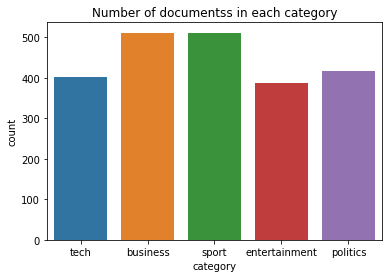

In [3]:
path = '/content/drive/My Drive/BTL_DataMining/BT_1/bbc-text.csv'
data = pd.read_csv(path)
print(data['category'].value_counts())
sns.countplot(data.category)
plt.title("Number of documentss in each category")
plt.show()

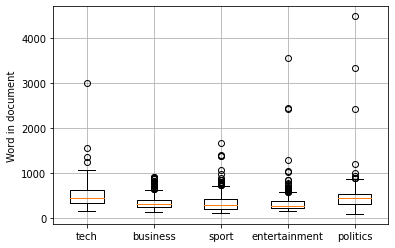

In [4]:
from collections import defaultdict
category_word_count = defaultdict(list)
for c in data.category.unique():
    val = data[data['category'] == c]['text'].str.split().apply(len).values
    category_word_count[c] = val 

plt.boxplot(category_word_count.values())
keys = category_word_count.keys()
plt.xticks([i + 1 for i in range(len(keys))], keys)
plt.ylabel("Word in document")
plt.grid()
plt.show()

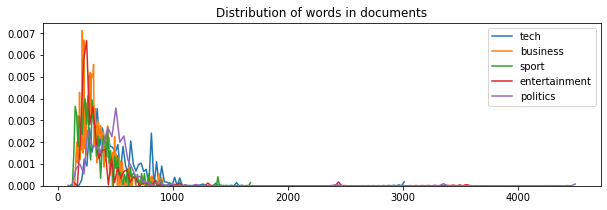

No handles with labels found to put in legend.


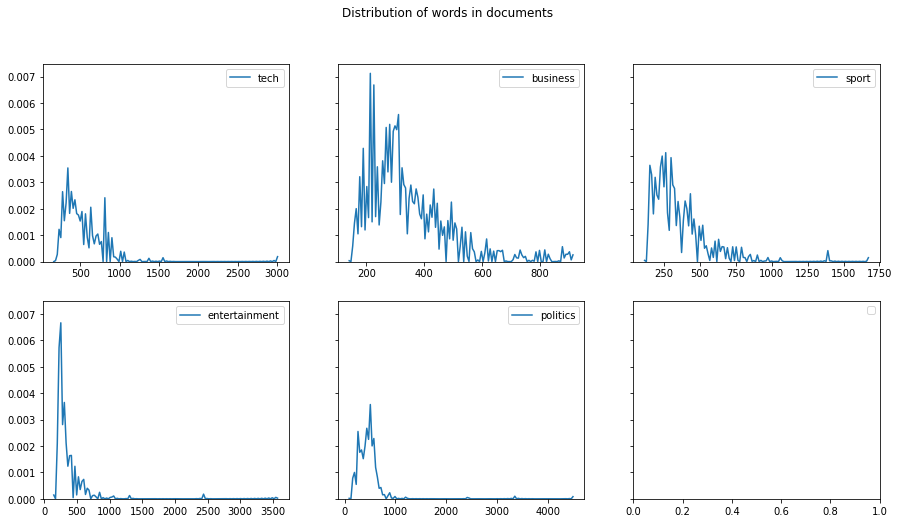

In [5]:
plt.figure(figsize= (10,3))
for key, value in category_word_count.items():
    sns.kdeplot(value, label = key, bw = 0.6)
plt.legend()
plt.title("Distribution of words in documents")
plt.show()
fig, axes = plt.subplots(2, 3, figsize = (15, 8), sharey = True)
ax = axes.flatten()
plt.suptitle("Distribution of words in documents")
for idx, (key, value) in enumerate(category_word_count.items()):
    sns.kdeplot(value, label = key, bw = 0.6, ax = ax[idx])
plt.legend()
plt.show()

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re 
from tqdm import tqdm
import time

stopwords = stopwords.words("english")
snow = nltk.stem.SnowballStemmer("english")

def pre_processing(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\t', ' ')
    text = text.replace('\\n', ' ')
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = text.lower()
    text = " ".join([snow.stem(word) for word in text.split()])
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text 
t0 = time.time()
text_clean = []
for d in tqdm(data['text']):
    d = pre_processing(d)
    text_clean.append(d)

print("aaaaaaaaa")
print(time.time() - t0)




  1%|          | 23/2225 [00:00<00:09, 227.32it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


100%|██████████| 2225/2225 [00:10<00:00, 203.49it/s]

aaaaaaaaa
10.939387321472168


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


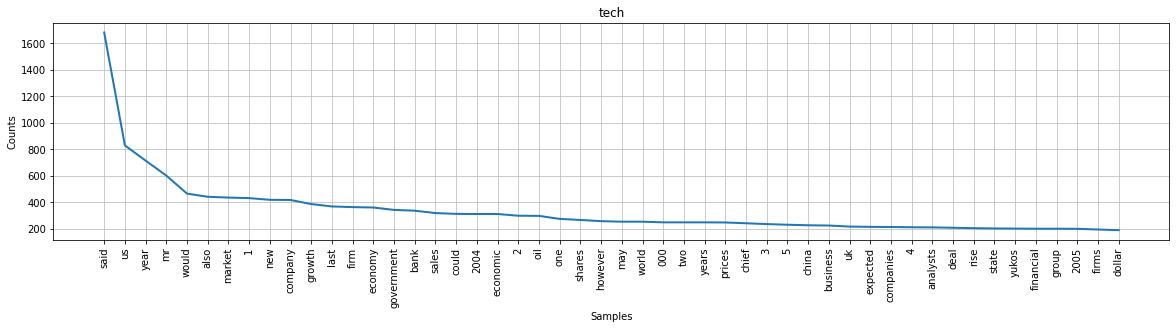

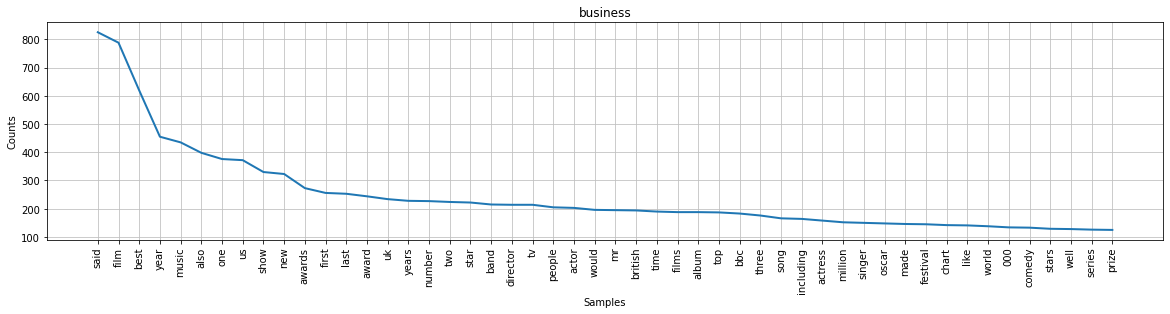

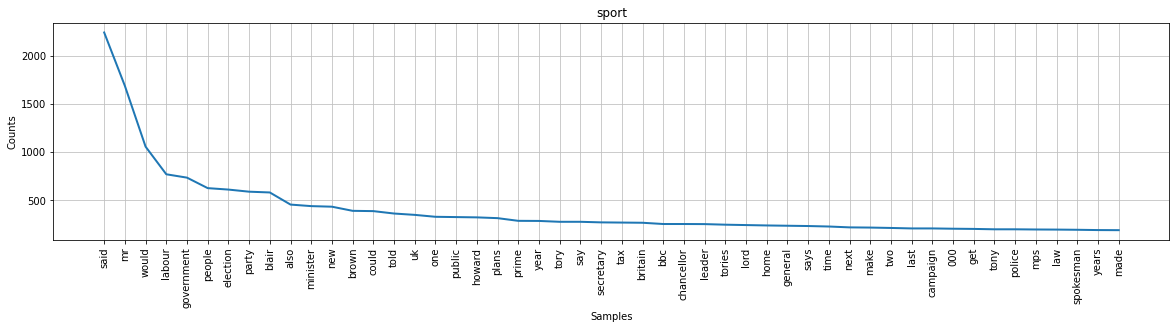

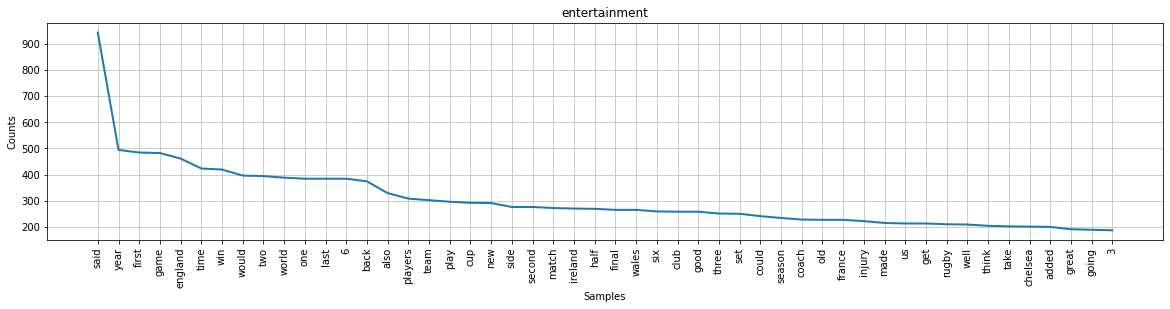

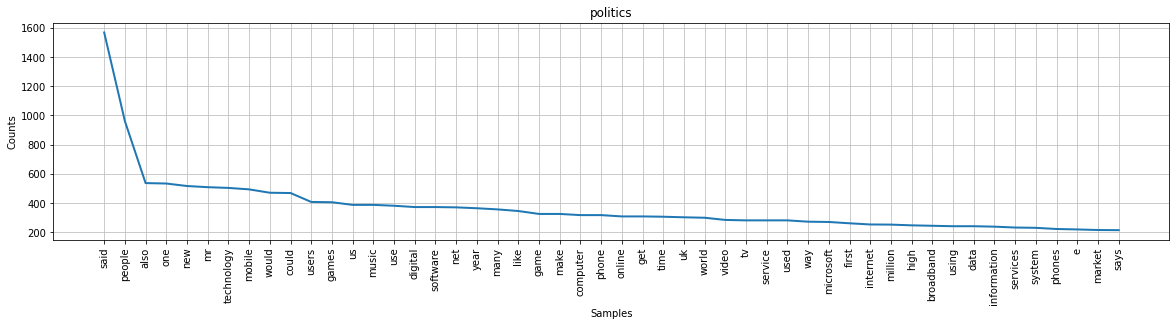

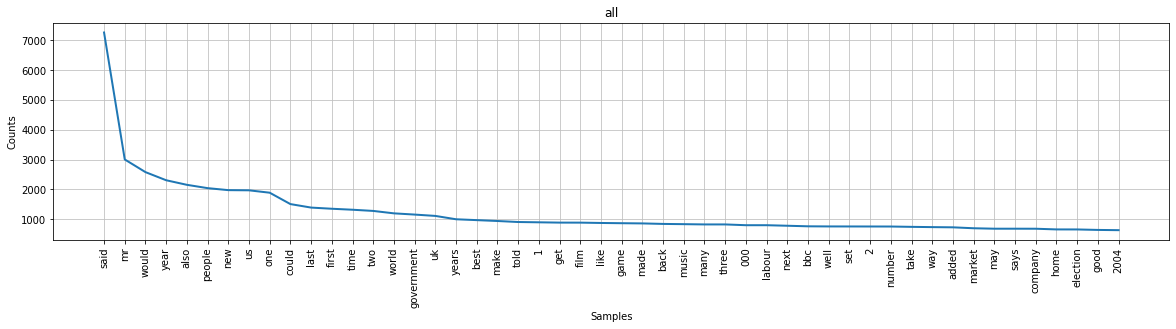

In [0]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

labels = {
    "0" : "tech",
    "1" : "business",
    "2" : "sport",
    "3" : "entertainment",
    "4" : "politics",
    "all" : "all"
}
label = LabelEncoder()
category_onehot = label.fit_transform(data['category'].values)
dic = {
    "0" : FreqDist(),
    "1" : FreqDist(),
    "2" : FreqDist(),
    "3" : FreqDist(),
    "4" : FreqDist(), 
    "all" : FreqDist()
}

for i in range(len(text_clean)):
    for word in word_tokenize(text_clean[i]):
        dic[str(category_onehot[i])][word] += 1
        dic["all"][word] += 1
for i, key in enumerate(dic.keys()):
    plt.figure(figsize=(20, 4))
    dic[key].plot(50, title = labels[key])
    plt.show()


In [0]:
print(data['text'][0])
print('\n\n')
print(text_clean[0])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import random

dataset = {
    "0" : [],
    "1" : [],
    "2" : [],
    "3" : [],
    "4" : []
}

for i in range(len(text_clean)):
    dataset[str(category_onehot[i])].append(text_clean[i])

data_train = []
data_test  = []
label_train = []
label_test  = []

for k in dataset.keys():
    a = set(i for i in range(len(dataset[k])))
    id_test = set(random.sample(a, 100))
    id_train = a - id_test
    for i in list(id_train):
        data_train.append(dataset[k][i])
        label_train.append(int(k))
    for i in list(id_test):
        data_test.append(dataset[k][i])
        label_test.append(int(k))




def train_model(cfl, X_train, X_test, Y_train, Y_test , vectorizer):
    X_train_vec = vectorizer.fit_transform(X_train)
    cfl.fit(X_train_vec.toarray(), Y_train)
    X_test_vec = vectorizer.transform(X_test)
    predict = cfl.predict(X_test_vec.toarray())
    print(classification_report(Y_test, predict))






In [0]:
count_vec = CountVectorizer(analyzer= "word")
tfidf_vec = TfidfVectorizer(analyzer= "word")

cfl_mul = MultinomialNB()
cfl_gau = GaussianNB()




[[0.         0.05135439 0.         ... 0.         0.         0.        ]
 [0.0561883  0.05799164 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.02604168 ... 0.         0.         0.        ]
 [0.03328934 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01908738 0.         ... 0.         0.         0.        ]]


In [0]:
train_model(cfl_mul, data_train, data_test, label_train, label_test, count_vec)
train_model(cfl_mul, data_train, data_test, label_train, label_test, tfidf_vec)
train_model(cfl_gau, data_train, data_test, label_train, label_test, count_vec)
train_model(cfl_gau, data_train, data_test, label_train, label_test, tfidf_vec)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       100
           1       0.99      0.95      0.97       100
           2       0.94      1.00      0.97       100
           3       1.00      0.99      0.99       100
           4       0.94      0.99      0.97       100

    accuracy                           0.97       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.98      0.97      0.97       500

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       100
           1       0.99      0.86      0.92       100
           2       0.96      0.99      0.98       100
           3       0.96      1.00      0.98       100
           4       0.98      0.97      0.97       100

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

              precisio